# The "Broken" Weather Station

Background: A mountain weather station has been offline for months and recently sent a burst of messy data. Before we can use the data and connect it to streamflow, it must be repaired and the Pandas toolkit can support this.

## Task 1: The Raw Feed 
Load the .csv of rainfall values and convert into a Pandas DataFrame named Rainfall_mm. The data can be found here:

```data/snotel_rainfall_data.csv```

Check your work: Use .head() and .describe(). Does the data look right?


In [1]:
import pandas as pd
import numpy as np
Rainfall_mm = pd.read_csv('data/snotel_rainfall_data.csv') #load rainfall data
print(Rainfall_mm.head()) 
print(Rainfall_mm.describe())

         Date            Precip_in
0  2024-01-01  0.14028030062619642
1  2024-01-02   0.6590180328421851
2  2024-01-03                  0.0
3  2024-01-04                  0.0
4  2024-01-05   0.3757291395473922
              Date Precip_in
count           61        58
unique          60        32
top     2024-01-16       0.0
freq             2        27


## Task 2: Using Pandas Tools to make the data readable

**coerce** turns anything it can't read as a number (like 'T' or 'error') into NaN


```df['colname'] = pd.to_numeric(df['colname'], errors='coerce')```

Apply this to your dataset and then try .describe()

In [2]:
# Convert the 'Precip_in' column to numeric, coercing errors to NaN
Rainfall_mm['Precip_in'] = pd.to_numeric(Rainfall_mm['Precip_in'], errors='coerce')

print(Rainfall_mm.describe())
print(Rainfall_mm.head(20))

        Precip_in
count   56.000000
mean    -8.467089
std    150.395286
min   -999.000000
25%      0.000000
50%      0.050563
75%      0.682890
max    500.000000
          Date  Precip_in
0   2024-01-01   0.140280
1   2024-01-02   0.659018
2   2024-01-03   0.000000
3   2024-01-04   0.000000
4   2024-01-05   0.375729
5   2024-01-06   0.000000
6   2024-01-07   1.095458
7   2024-01-08   0.000000
8   2024-01-09   0.000000
9   2024-01-10   0.186576
10  2024-01-11        NaN
11  2024-01-12        NaN
12  2024-01-13        NaN
13  2024-01-14   0.000000
14  2024-01-15   0.385756
15  2024-01-16   0.000000
16  2024-01-16   0.000000
17  2024-01-17   3.380971
18  2024-01-18   0.000000
19  2024-01-19   0.532611


## Task 3: Load the discharge data

Load the .csv of rainfall values and convert into a Pandas Dataframe named streamflow_cfs. The data can be found here:

```data/streamflow_data.csv```

Check your work: Use .head() and .describe(). Does the data look right? How can you extract more useful statistics? Show this.

In [3]:
streamflow_cfs = pd.read_csv('data/streamflow_data.csv') #load streamflow data

streamflow_cfs['Streamflow_cfs'] = pd.to_numeric(streamflow_cfs['Streamflow_cfs'], errors='coerce')


print(streamflow_cfs.head(20))
print(streamflow_cfs.describe())



          Date  Streamflow_cfs
0   2024-01-01           10.25
1   2024-01-02           10.70
2   2024-01-03           13.30
3   2024-01-04           10.10
4   2024-01-05           10.00
5   2024-01-06           11.90
6   2024-01-07           10.00
7   2024-01-08           15.50
8   2024-01-09           10.15
9   2024-01-10           10.45
10  2024-01-11             NaN
11  2024-01-12             NaN
12  2024-01-13             NaN
13  2024-01-14             NaN
14  2024-01-15             NaN
15  2024-01-16           11.95
16  2024-01-17           10.00
17  2024-01-18           26.90
18  2024-01-19           10.45
19  2024-01-20           12.65
       Streamflow_cfs
count       54.000000
mean        40.058333
std        369.096212
min       -999.000000
25%         10.100000
50%         10.600000
75%         13.900000
max       2510.000000


## Task 4: Clean and repair the data

The sensor cut out during the storm and we now have NaN **AND** -999 values. This prevents us from plotting or otherwise using the time series. Are there any other values we should remove?

Explore different methods and select one that fits the data.

Explore .dropna() (delete the gap), .fillna() with the mean, and .interpolate() for a smoother hydrograph for both datasets.

Note, it may be useful to create a new Pandas DataFrame to compare differences. 

In [4]:





#create another datafram that replaces the negative values and values greater than 50 with NaN
Rainfall_mm_cleaned = Rainfall_mm.copy()

Rainfall_mm_cleaned['Precip_in'] = (
Rainfall_mm_cleaned['Precip_in']
    .mask(
        (Rainfall_mm_cleaned['Precip_in'] < 0) |
        (Rainfall_mm_cleaned['Precip_in'] > 50),
        np.nan
    )
)

#replaces the NaN values with the mean of the column
Rainfall_mean = Rainfall_mm_cleaned.copy()
Rainfall_mean['Precip_in'].fillna(
    Rainfall_mean['Precip_in'].mean(),
    inplace=True
)
# print(Rainfall_mean.head(20))
print(Rainfall_mean.describe())



       Precip_in
count  61.000000
mean    0.460056
std     0.742892
min     0.000000
25%     0.000000
50%     0.168414
75%     0.532611
max     3.609354


/scratch/local/u1405836/877823/ipykernel_3385735/3089343803.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Rainfall_mean['Precip_in'].fillna(


In [5]:
#create another cleeaned rainfall dataframe that is cleaned by using .drop(na) to fill the negative values and values greater than 50
Rainfall_drop = Rainfall_mm_cleaned.dropna(subset=['Precip_in'])
# print(Rainfall_drop.head(40))
print(Rainfall_drop.describe())

       Precip_in
count  54.000000
mean    0.460056
std     0.790430
min     0.000000
25%     0.000000
50%     0.050563
75%     0.641326
max     3.609354


In [6]:
#create another cleaned rainfall dataframe that is cleaned by using interpolate to remove the negative values and values greater than 50

Rainfall_interp = Rainfall_mm_cleaned.copy()
Rainfall_interp['Precip_in'] = (
    Rainfall_interp['Precip_in']
    .interpolate(method='linear')
)
# print(Rainfall_interp.head(20))
print(Rainfall_interp.describe())

       Precip_in
count  61.000000
mean    0.461189
std     0.781009
min     0.000000
25%     0.000000
50%     0.093288
75%     0.659018
max     3.609354


In [7]:
#create another streamflow dataframe that replaces the negative values and values greater than 500 with NaN
streamflow_cfs_cleaned = streamflow_cfs.copy()

streamflow_cfs_cleaned['Streamflow_cfs'] = (
streamflow_cfs_cleaned['Streamflow_cfs']
    .mask(
        (streamflow_cfs_cleaned['Streamflow_cfs'] < 0) |
        (streamflow_cfs_cleaned['Streamflow_cfs'] > 500),
        np.nan
    )
)

#replaces the NaN values with the mean of the column
streamflow_mean = streamflow_cfs_cleaned.copy()
streamflow_mean['Streamflow_cfs'].fillna(
    streamflow_mean['Streamflow_cfs'].mean(),
    inplace=True
)
# print(Rainfall_mean.head(20))
print(streamflow_mean.describe())


       Streamflow_cfs
count       60.000000
mean        12.541346
std          3.367488
min         10.000000
25%         10.225000
50%         11.675000
75%         13.262500
max         26.900000


/scratch/local/u1405836/877823/ipykernel_3385735/193954182.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  streamflow_mean['Streamflow_cfs'].fillna(


In [8]:
#create another cleeaned rainfall dataframe that is cleaned by using .drop(na) to fill the negative values and values greater than 50
streamflow_drop = streamflow_cfs_cleaned.dropna(subset=['Streamflow_cfs'])
# print(Rainfall_drop.head(40))
print(streamflow_drop.describe())

       Streamflow_cfs
count       52.000000
mean        12.541346
std          3.621988
min         10.000000
25%         10.100000
50%         10.600000
75%         13.800000
max         26.900000


In [16]:
#create another cleaned rainfall dataframe that is cleaned by using interpolate to remove the negative values and values greater than 50

streamflow_interp = streamflow_cfs_cleaned.copy()
streamflow_interp['Streamflow_cfs'] = (
    streamflow_interp['Streamflow_cfs']
    .interpolate(method='linear')
)
# print(Rainfall_interp.head(20))
print(streamflow_interp.describe())
print(streamflow_interp.head(20))

       Streamflow_cfs
count       60.000000
mean        12.545417
std          3.452779
min         10.000000
25%         10.225000
50%         11.075000
75%         13.800000
max         26.900000
          Date  Streamflow_cfs
0   2024-01-01           10.25
1   2024-01-02           10.70
2   2024-01-03           13.30
3   2024-01-04           10.10
4   2024-01-05           10.00
5   2024-01-06           11.90
6   2024-01-07           10.00
7   2024-01-08           15.50
8   2024-01-09           10.15
9   2024-01-10           10.45
10  2024-01-11           10.70
11  2024-01-12           10.95
12  2024-01-13           11.20
13  2024-01-14           11.45
14  2024-01-15           11.70
15  2024-01-16           11.95
16  2024-01-17           10.00
17  2024-01-18           26.90
18  2024-01-19           10.45
19  2024-01-20           12.65


## Task 5: Join Pandas DataFrames

We often want to relate data to another, and having all the data in once centralized data frame supports this comparison. Create a new Pandas DataFrame named:
* rainfall_methods fill it with the three rainfall dataframes we cleaned
* streamflow_methods and fill it with the three streamflow dataframes we cleaned


In [ ]:
#create a new dataframe that combines each of the three cleaned rainfall dataframes called rainfall_methods by Date index
rainfall_methods = pd.DataFrame({
    'Mean_Cleaned': Rainfall_mean['Precip_in'],
    'Dropna_Cleaned': Rainfall_drop['Precip_in'],
    'Interpolate_Cleaned': Rainfall_interp['Precip_in']
})



#create a new datafram that combines each of the three cleaned streamflow dataframes called streamflow_methods
streamflow_methods = pd.DataFrame({
    'Mean_Cleaned': streamflow_mean['Streamflow_cfs'],
    'Dropna_Cleaned': streamflow_drop['Streamflow_cfs'],
    'Interpolate_Cleaned': streamflow_interp['Streamflow_cfs']
})



   Mean_Cleaned  Dropna_Cleaned  Interpolate_Cleaned
0      0.140280        0.140280             0.140280
1      0.659018        0.659018             0.659018
2      0.000000        0.000000             0.000000
3      0.000000        0.000000             0.000000
4      0.375729        0.375729             0.375729


## Task 6: Plot the rainfall and streamflow data to visualize trends and relationships.

Use Pandas simple plotting functionality to separately plot the two dataframes. Which interpolation method do you like? 

<Axes: title={'center': 'Streamflow Methods'}, ylabel='Streamflow (cfs)'>

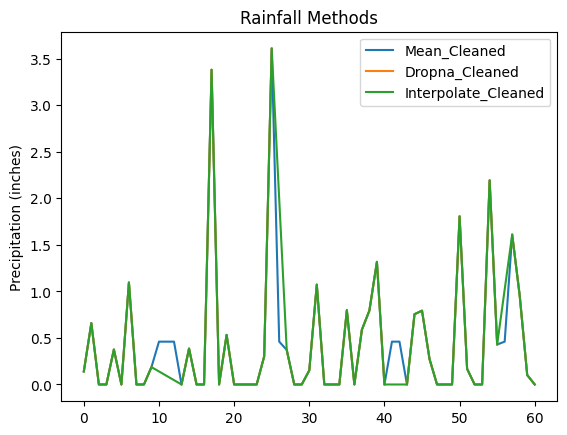

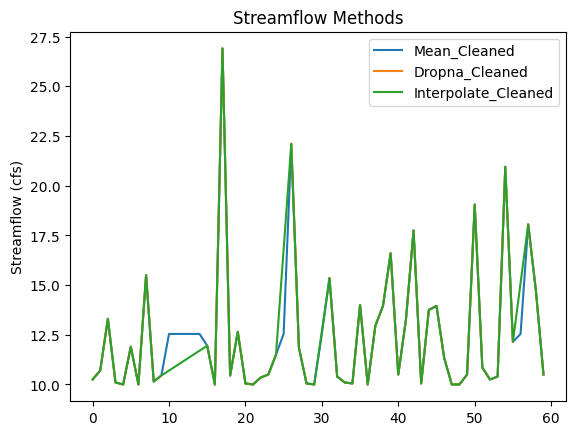

In [ ]:
#use pandas simple plotting to plot the streamflow methods and rainfall methods dataframes seperately
rainfall_methods.plot(title='Rainfall Methods', ylabel='Precipitation (inches)')
streamflow_methods.plot(title='Streamflow Methods', ylabel='Streamflow (cfs)')

#the interpolate method is my favorite, as the mean appears to create two some peaks that may not be real. 

## Task 7: Combining DataFrames

From the plots above, choose your most representative gap filling dataframe for rainfall and streamflow, and combine them into a rain_flow_df DataFrame.

In [24]:
# Make sure Date columns are datetime
Rainfall_interp['Date'] = pd.to_datetime(Rainfall_interp['Date'])
streamflow_interp['Date'] = pd.to_datetime(streamflow_interp['Date'])

# Set Date as index
Rainfall_interp = Rainfall_interp.set_index('Date')
streamflow_interp = streamflow_interp.set_index('Date')

# Combine into new dataframe
rain_flow_df = Rainfall_interp.join(streamflow_interp)

# Check result
print(rain_flow_df.head())

            Precip_in  Streamflow_cfs
Date                                 
2024-01-01   0.140280           10.25
2024-01-02   0.659018           10.70
2024-01-03   0.000000           13.30
2024-01-04   0.000000           10.10
2024-01-05   0.375729           10.00


## Task 8: Calculate the monthly statistics of the rainfall and discharge

Calculate the monthly total, mean daily (for each month), and the maximum (for each month) rainfall and flow. 

In [27]:
#calculate the monthly total for each month of rainfall and streamflow using the rain_flow_df dataframe
rain_flow_df['Month'] = pd.to_datetime(rain_flow_df.index).month
monthly_totals = rain_flow_df.groupby('Month').sum()
print(monthly_totals)

#calculate the mean daily (for each month) for each month of rainfall and streamflow using the rain_flow_df dataframe
monthly_means = rain_flow_df.groupby('Month').mean()
print(monthly_means)    

#calculate the max for each month of rainfall and streamflow using the rain_flow_df dataframe
monthly_max = rain_flow_df.groupby('Month').max()
print(monthly_max)

       Precip_in  Streamflow_cfs
Month                           
1      14.531730         388.125
2      13.600824         376.550
       Precip_in  Streamflow_cfs
Month                           
1       0.454117       12.128906
2       0.468994       12.984483
       Precip_in  Streamflow_cfs
Month                           
1       3.609354           26.90
2       2.193069           20.95


## Task 9: Data Corrections

We want to put the data into a streamflow model, but it requires precipitation to be in mm and streamflow to be in CMS (cubic meters per second). Create a new dataframe called rain_flow_SI_df that converts the previous dataframe to SI units.

In [29]:
#create a new dataframe called rain_flow_SI_df that converts the previous datafram to SI units (mm for rainfall and CMS for streamflow)
rain_flow_SI_df = rain_flow_df.copy()
rain_flow_SI_df['Precip_mm'] = rain_flow_SI_df['Precip_in'] * 25.4
rain_flow_SI_df['Streamflow_cms'] = rain_flow_SI_df['Streamflow_cfs'] * 0.0283168
#get rid of the original columns
rain_flow_SI_df = rain_flow_SI_df.drop(columns=['Precip_in', 'Streamflow_cfs'])
print(rain_flow_SI_df.head())


            Month  Precip_mm  Streamflow_cms
Date                                        
2024-01-01      1   3.563120        0.290247
2024-01-02      1  16.739058        0.302990
2024-01-03      1   0.000000        0.376613
2024-01-04      1   0.000000        0.286000
2024-01-05      1   9.543520        0.283168


## Task 10: Event diagnostics

A key element of hydroinformatics is to identify key events and learn from them. Here, we have two tasks.
* Create a new column and programatically label each day as 'Dry', 'Light Rain', or 'Heavy Rain' based on the precipitaiton colum.
* From our rain_flow_SI_df, create a new Pandas DataFrame called storm_df that programatically selects the streamflow and precipitation data for 5 days before and after the peak flow event.

In [ ]:
#create a new column in the rain_flow_SI_df dataframe that programmatically labels each day as 'Dry', 'Light Rain', or 'Heavy Rain' based on the precip column
def label_rain(row):
    if row['Precip_mm'] == 0:
        return 'Dry'
    elif row['Precip_mm'] < 2.5:
        return 'Light Rain'
    else:
        return 'Heavy Rain' 
    
rain_flow_SI_df['Rain_Category'] = rain_flow_SI_df.apply(label_rain, axis=1)
print(rain_flow_SI_df.head())



            Month  Precip_mm  Streamflow_cms Rain_Category
Date                                                      
2024-01-01      1   3.563120        0.290247    Heavy Rain
2024-01-02      1  16.739058        0.302990    Heavy Rain
2024-01-03      1   0.000000        0.376613           Dry
2024-01-04      1   0.000000        0.286000           Dry
2024-01-05      1   9.543520        0.283168    Heavy Rain
            Month  Precip_mm  Streamflow_cms Rain_Category
Date                                                      
2024-01-13      1   1.184761        0.317148    Light Rain
2024-01-14      1   0.000000        0.324227           Dry
2024-01-15      1   9.798213        0.331307    Heavy Rain
2024-01-16      1   0.000000        0.338386           Dry
2024-01-16      1   0.000000        0.338386           Dry
2024-01-17      1  85.876653        0.283168    Heavy Rain
2024-01-18      1   0.000000        0.761722           Dry
2024-01-19      1  13.528311        0.295911    Heavy Ra

In [33]:
#from the rain_flow_SI_df create a new dataframe called storm_df that programatically selects the streamflow and precip data for 5 days before and after the peak flow day
peak_flow_day = rain_flow_SI_df['Streamflow_cms'].idxmax()
storm_df = rain_flow_SI_df.loc[peak_flow_day - pd.Timedelta(days=5):peak_flow_day + pd.Timedelta(days=5)]
print(storm_df)

            Month  Precip_mm  Streamflow_cms Rain_Category
Date                                                      
2024-01-13      1   1.184761        0.317148    Light Rain
2024-01-14      1   0.000000        0.324227           Dry
2024-01-15      1   9.798213        0.331307    Heavy Rain
2024-01-16      1   0.000000        0.338386           Dry
2024-01-16      1   0.000000        0.338386           Dry
2024-01-17      1  85.876653        0.283168    Heavy Rain
2024-01-18      1   0.000000        0.761722           Dry
2024-01-19      1  13.528311        0.295911    Heavy Rain
2024-01-20      1   0.000000        0.358208           Dry
2024-01-21      1   0.000000        0.284584           Dry
2024-01-22      1   0.000000        0.283168           Dry
2024-01-23      1   0.000000        0.293079           Dry


## Task 11: Quick Data Visualziation

Use the pandas plot function to conduct a quick visualization of precipitation and streamflow. Do they seem coorelated? Any glaring errors?

<Axes: title={'center': 'Precipitation Over Time'}, xlabel='Date', ylabel='Precipitation (mm)'>

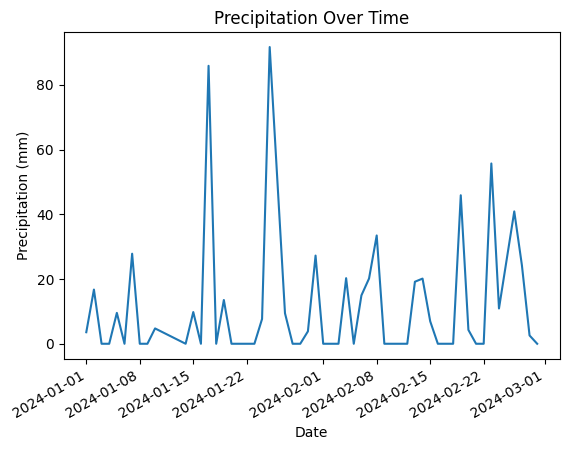

In [36]:
 

#use pandas plot to plot the precip only    
rain_flow_SI_df['Precip_mm'].plot(title='Precipitation Over Time', ylabel='Precipitation (mm)')

<Axes: title={'center': 'Streamflow Over Time'}, xlabel='Date', ylabel='Streamflow (cms)'>

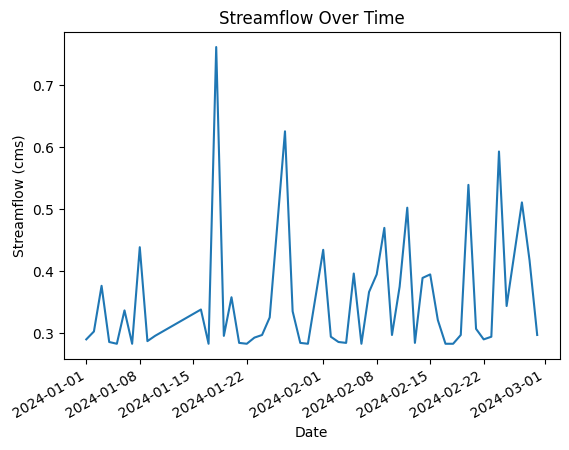

In [37]:
#plot the streamflow only
rain_flow_SI_df['Streamflow_cms'].plot(title='Streamflow Over Time', ylabel='Streamflow (cms)')

these plots seem to be extremely correlated, with each having peaks that match the others'. I do not see any glaring details.